In [2]:
import math
import cv2
import numpy as np
import pandas as pd
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [3]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [4]:
#Initialzing  mediapipe pose class
mp_pose =mp.solutions.pose
#Setting up the Pose function
#static_image_mode=True for all videos and fro tracking , with less accuracy
pose = mp_pose.Pose(static_image_mode=True , min_detection_confidence=0.3, model_complexity=2)
# Initializing mediapipe drawing class, useful for annotations
mp_drawing = mp.solutions.drawing_utils

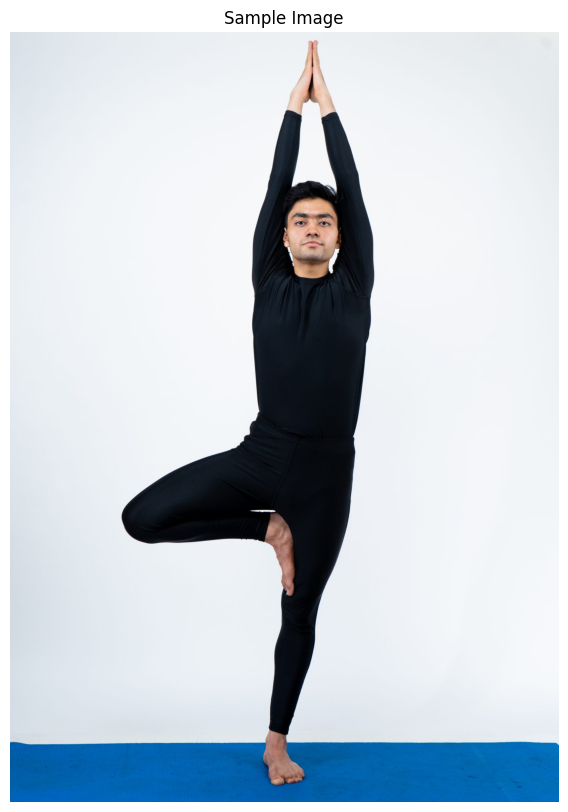

In [5]:
#Read an image from specified path
sample_img = cv2.imread('Downloads\sample_img.jpg')
#Specify the size of the figure
plt.figure(figsize=[10,10])
#Display the image , also convbert the RGB to BGR for display
plt.title("Sample Image");plt.axis("off");plt.imshow(sample_img[:,:,::-1]);plt.show()

In [6]:
#Perform Pose detection after converting the image into RGB format
results = pose.process(cv2.cvtColor(sample_img,cv2.COLOR_BGR2RGB))
#Check if any landmarks are found .
if results.pose_landmarks:
    #Iterate 2 times as we want only to display first two landmarks.
    for i in range(2) :
        #Display the found normalized landmarks.
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE:
x: 0.55007195
y: 0.26304546
z: -0.4359111
visibility: 0.9962788

LEFT_EYE_INNER:
x: 0.5643755
y: 0.24746199
z: -0.39923763
visibility: 0.9971551



In [7]:
#Retrieve the height and width of the image .
image_height , image_width,_ = sample_img.shape
#Check if any landmarks are found 
if results.pose_landmarks:
    #Iterate 2 times as we want only to display first two landmarks.
 for i in range (2): 
     #Display the found normalized landmarks after  the converting them into their original scale.
     print(f'{mp_pose.PoseLandmark(i).name}:')
     print(f'x:{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x*image_width}')
     print(f'y:{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y*image_height}')
     print(f'z:{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z*image_width}')
     print(f'visibility:{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

NOSE:
x:1002.2311015129089
y:673.3963775634766
z:-794.2300044894218
visibility:0.9962788224220276

LEFT_EYE_INNER:
x:1028.2921969890594
y:633.5026931762695
z:-727.410966873169
visibility:0.9971550703048706



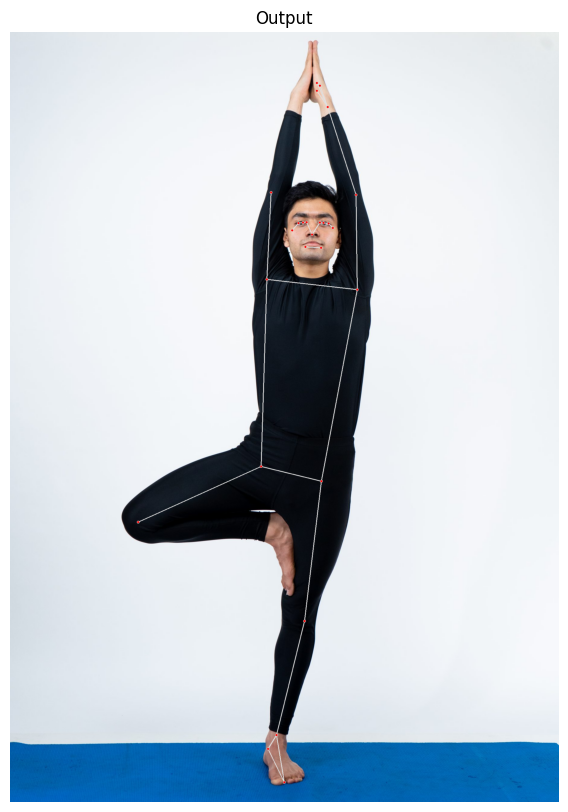

In [8]:
#Create a copy of the sample image to draw landmarks on.
img_copy = sample_img.copy()
#Check if any landmarks are found.
if results.pose_landmarks:
    #Draw pose landmarks on the sample image 
    mp_drawing.draw_landmarks(image=img_copy,landmark_list= results.pose_landmarks,connections=mp_pose.POSE_CONNECTIONS)
    #Specify a figure size of 
    fig = plt.figure(figsize=[10,10])
    #Display the output figure with landmarks drawn and convert img from BGR to RGB for display
    plt.title("Output");plt.axis("off");plt.imshow(img_copy[:,:,::-1]);plt.show()

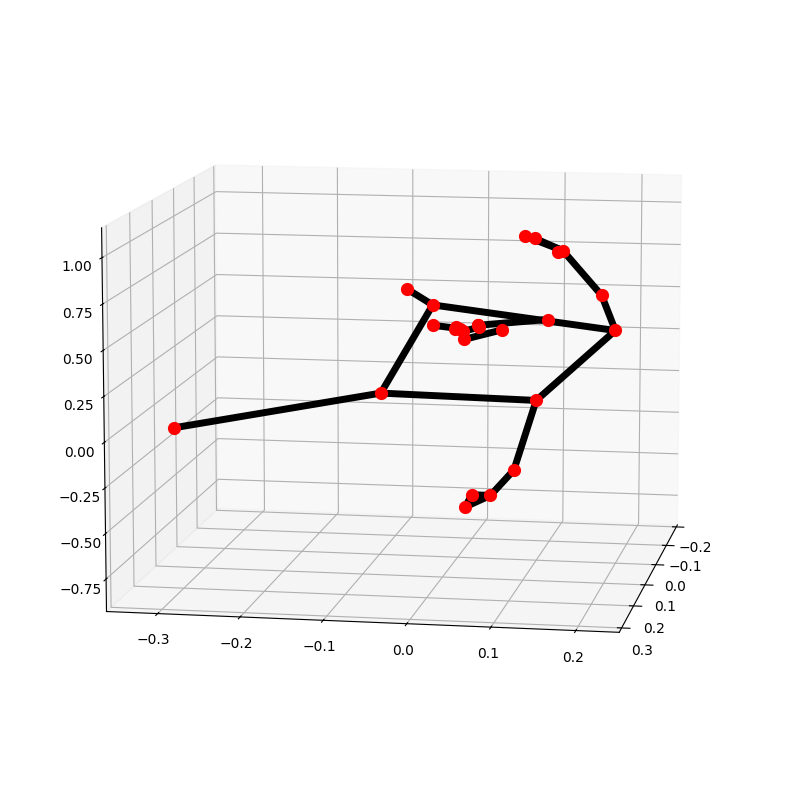

In [9]:
#Drawing the landmarks point while in 3D
mp_drawing.plot_landmarks(results.pose_world_landmarks,mp_pose.POSE_CONNECTIONS)

In [10]:
def detectPose(image,pose,display=True) :
 output_image = image.copy()
 imageRGB = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
 results=pose.process(imageRGB) 
 height,width,_ = image.shape
 landmarks=[]
 if results.pose_landmarks:
      mp_drawing.draw_landmarks(image=output_image,landmark_list= results.pose_landmarks,connections=mp_pose.POSE_CONNECTIONS)
      for landmark in results.pose_landmarks.landmark :
         landmarks.append((int(landmark.x*width),int(landmark.y*height),int(landmark.z*width)))
      if display:
       plt.figure(figsize=[22,22]);
       plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
       plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
       mp_drawing.plot_landmarks(results.pose_world_landmarks,mp_pose.POSE_CONNECTIONS)
      else :
        return output_image,landmarks

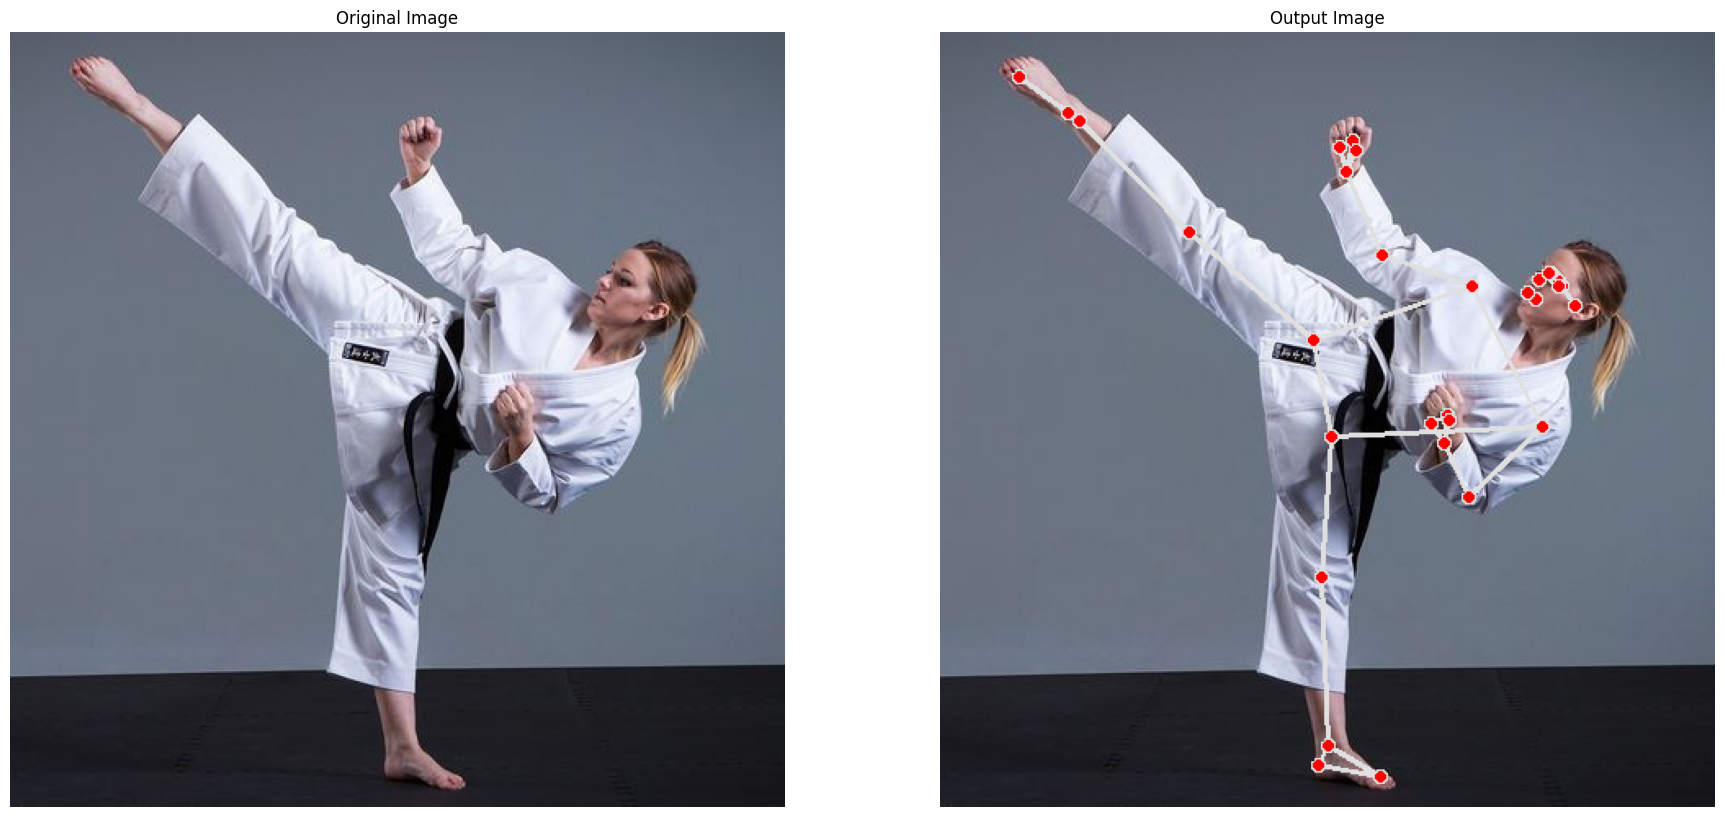

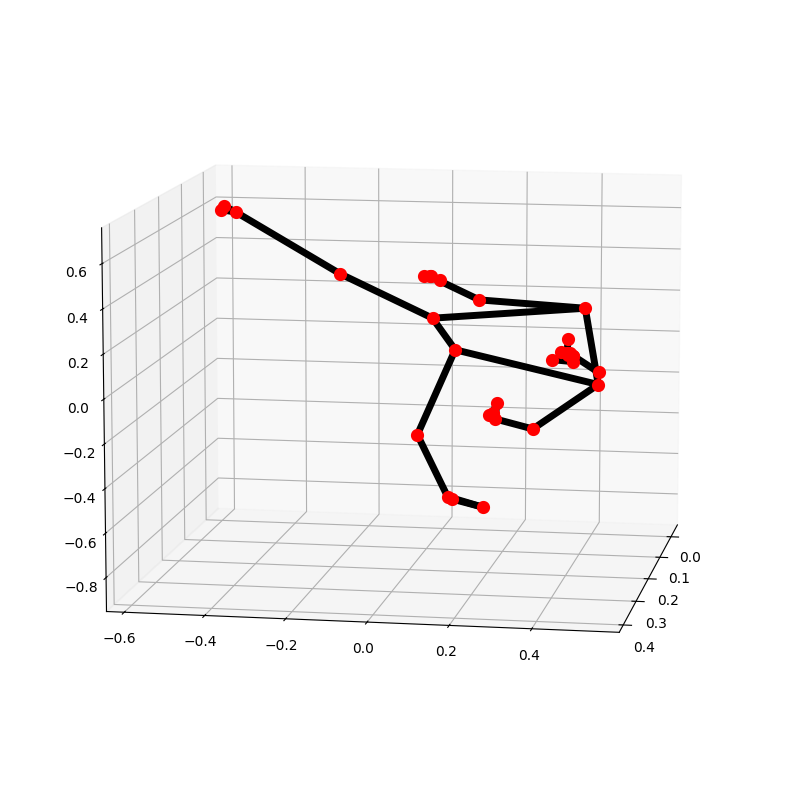

In [11]:
image = cv2.imread('Downloads\sample_img2.jpg')
detectPose(image,pose,display=True) 

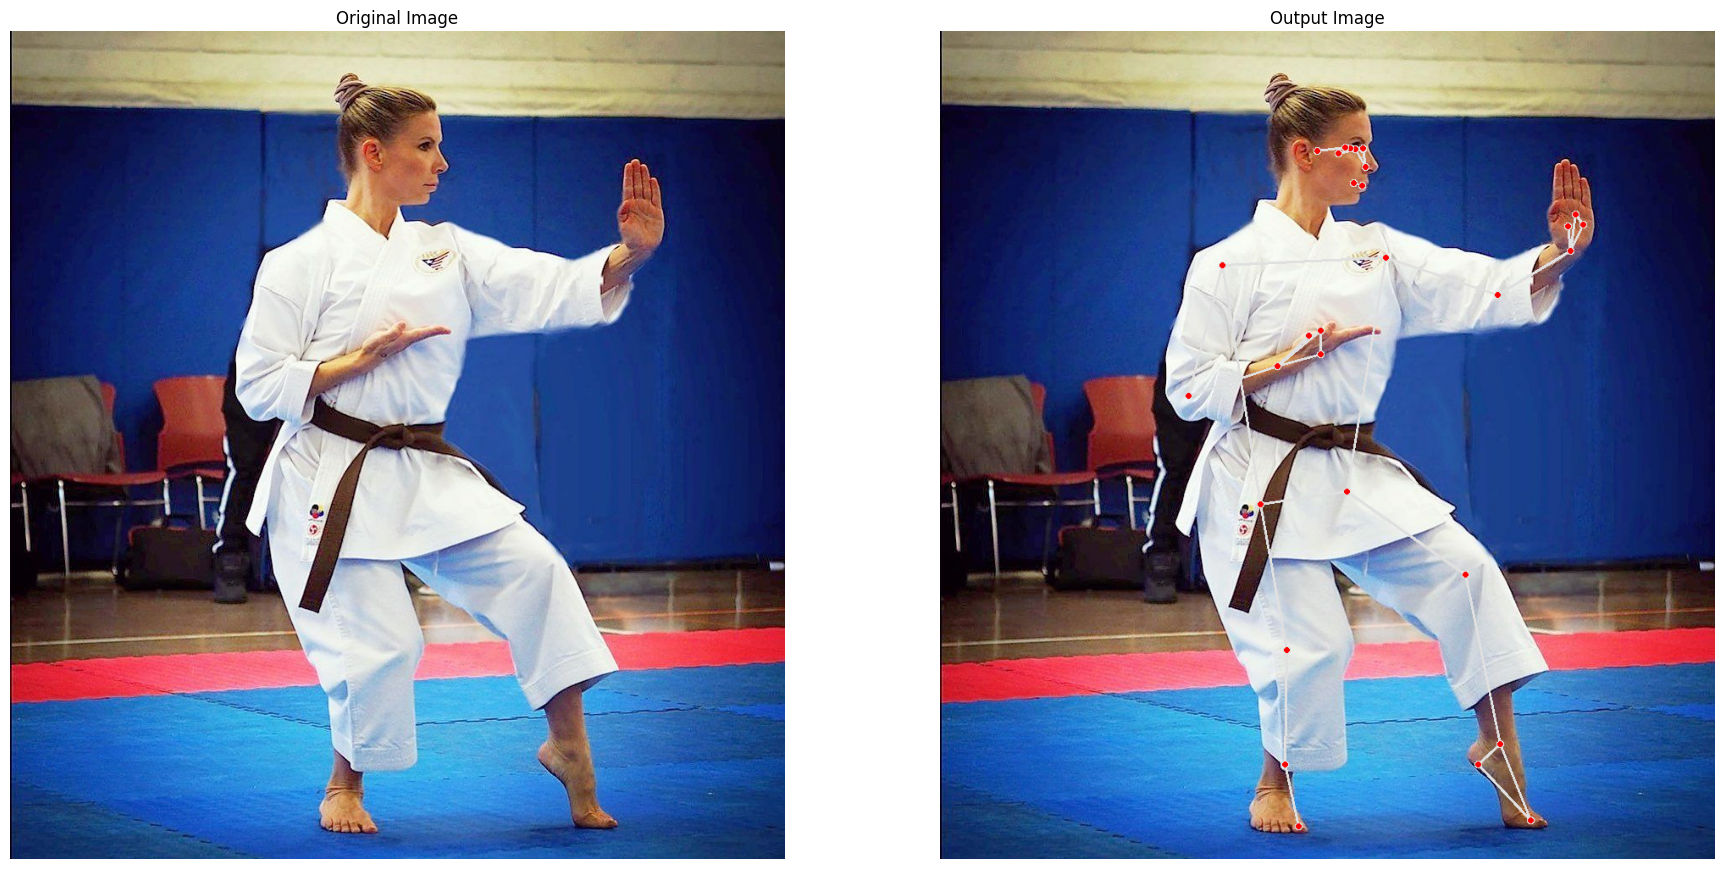

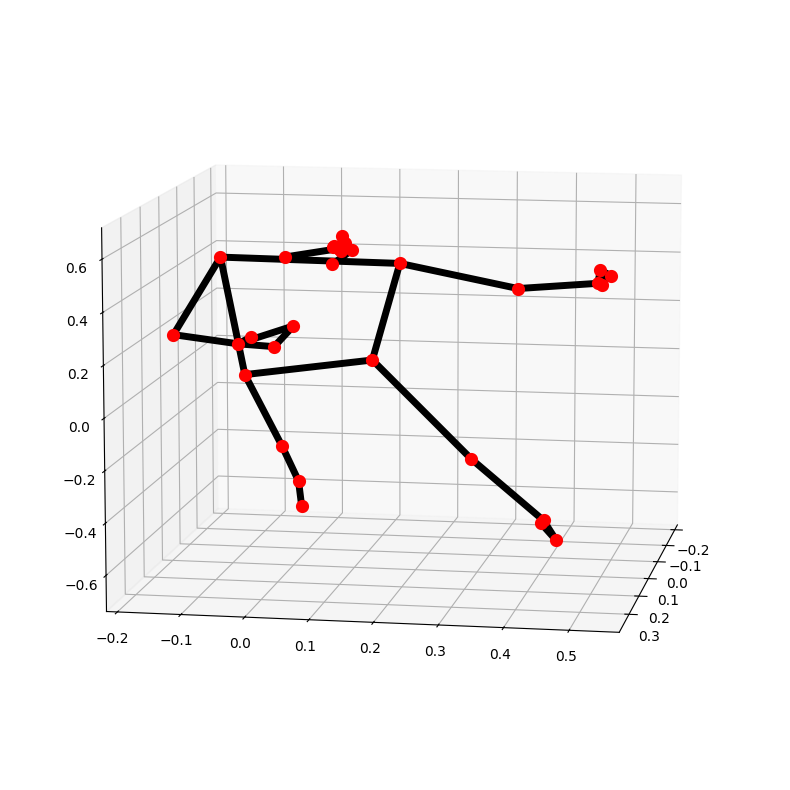

In [12]:
image = cv2.imread('Downloads\sample_img3.jpg')
detectPose(image,pose,display=True) 

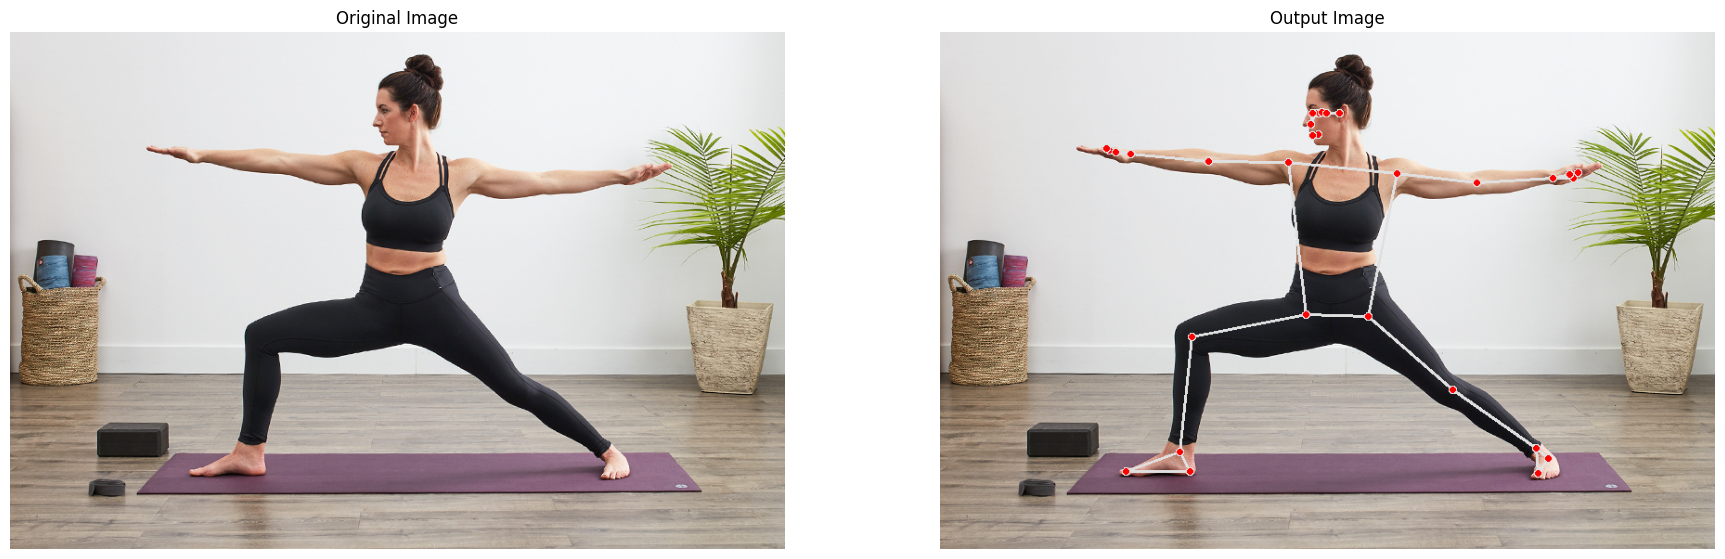

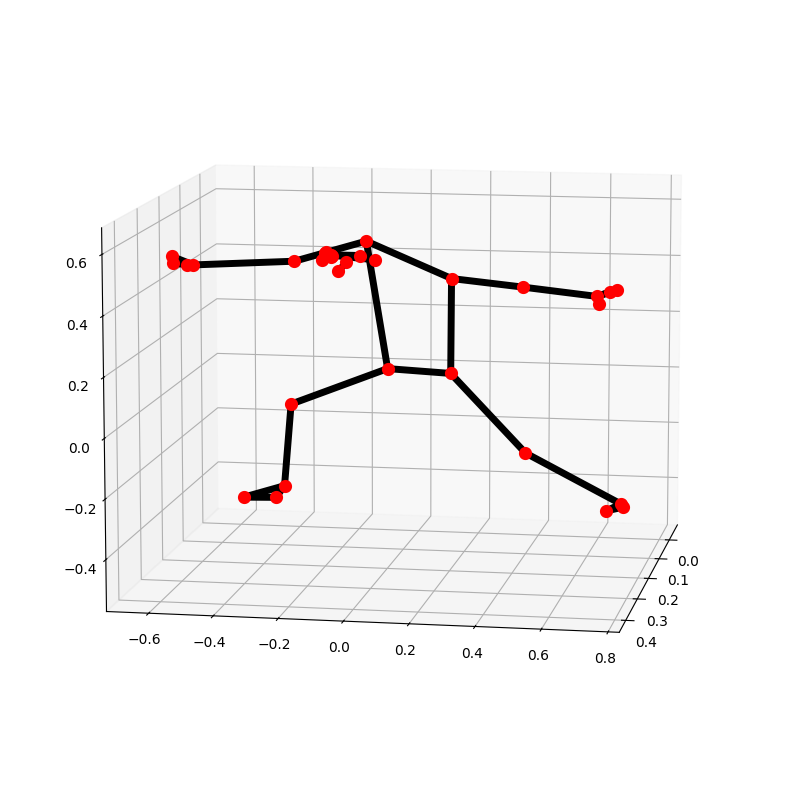

In [13]:
image = cv2.imread('Downloads\sample_img4.jpg')
detectPose(image,pose,display=True) 

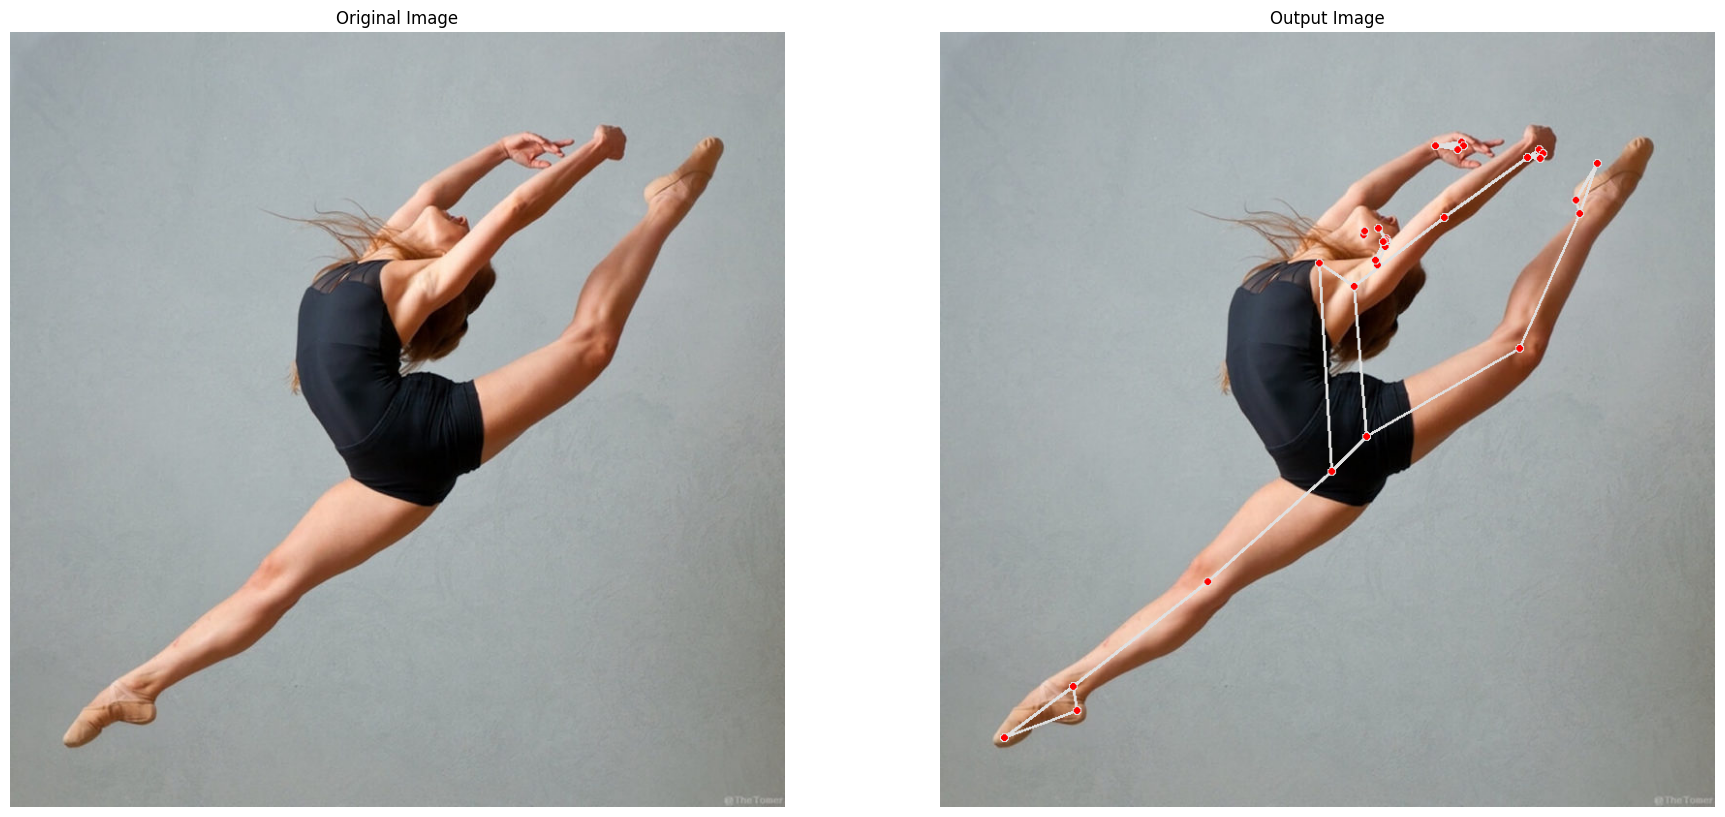

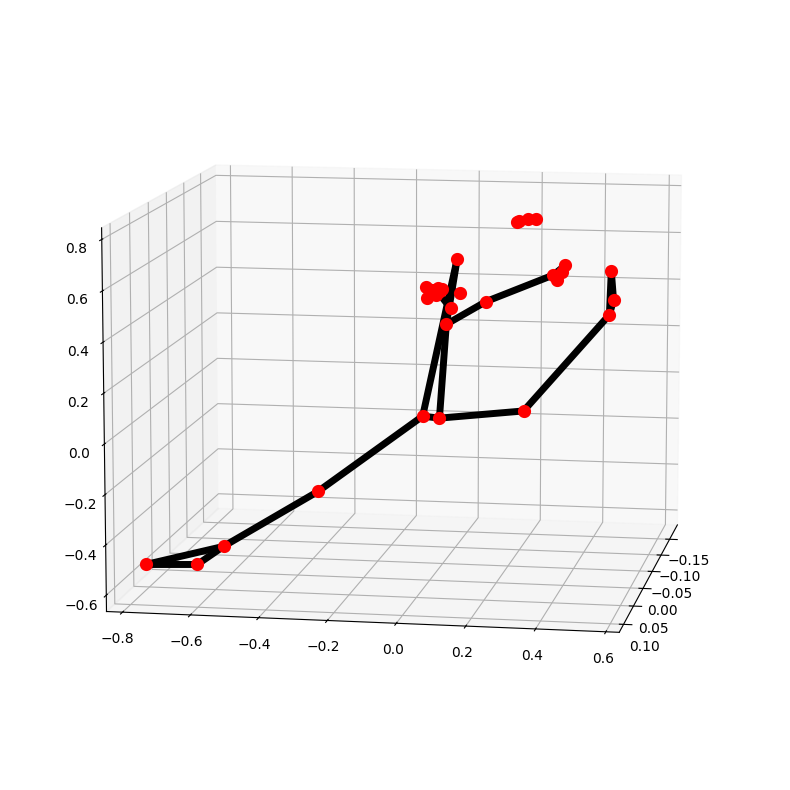

In [14]:
image = cv2.imread('Downloads\sample_img5.jpg')
detectPose(image,pose,display=True) 

In [15]:
#Setup Pose Function for video
pose_video= mp_pose.Pose(static_image_mode=False , min_detection_confidence=0.5, model_complexity=1)
#Initialize the VideoCapture object to read from the webcam.
video = cv2.VideoCapture(1)
cv2.namedWindow('Pose Detection',cv2.WINDOW_NORMAL)
#Take video from the stored disk or local machine
# video = cv2.VideoCapture('Downloads\sample_vid.mp4')
#Set video camera size as
video.set(3,1280)
video.set(4,960)
#Initialize a varible to store the time of previous frame 
time1 = 0
#Iterate until the video is accessed successfully
while video.isOpened():
    #Read a frame
    ok , frame = video.read()
    #Check , if frame is not read properly
    if not ok:
        #BReak the loop
        break
    #flip the frame horizontally for natural (selfie - view) visualization.
    frame = cv2.flip(frame, 1)
    #Get the width and height of the frame 
    frame_height,frame_width,_=frame.shape
    #Resize the frame while keeping the aspect ratio,
    frame=cv2.resize(frame,(int(frame_width *(640/ frame_height)),640))
    #Perform Pose landmark detection 
    frame,_=detectPose(image,pose,display=False) 
    #set the time for this  frame to current time
    time2 = time()
    #Check the difference between the previous and this frame time >0 to avoid division by zero error
    if(time2 - time1 )>0 :
        #Calculate the no. of frames per secs
        frames_per_second =1.0/(time2 - time1)
        #Write the no. of frames calculated on the frame
        cv2.putText(frame,'FPS:{}'.format(int(frames_per_second)),(10,30),cv2.FONT_HERSHEY_PLAIN,2,(0,255,0),3)
        time1=time2;
        #Display the frame 
        cv2.imshow('Pose Detection',frame)
        #Wait until a key is pressed
        k=cv2.waitKey(1)& 0xFF
        #Check if ESC is pressed
        if(k==27) :
            break
#Release the videocapture
video.release()
#Close all the windows
cv2.destroyAllWindows()